<a href="https://colab.research.google.com/github/choiitea/Choi_DSPN_S24/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 9: Classification

This homework assignment is designed to give you practice with classification models. We'll try to predict which words are more likely to be responded to correctly during a lexical decision task, based on their length and frequency.

We will be using data from the English Lexicon Project again. However, this time we will use response correctness as our dependent variable. Load **LexicalData_withIncorrect.csv**, which includes incorrect trials as well as correct ones, and also **Items.csv**. Both can be found in the *Homework/lexDat* folder in the class GitHub repository.

This data is a subset of the [English Lexicon Project database](https://elexicon.wustl.edu/). It provides response correctness and reaction times (in milliseconds) of many subjects as they are presented with letter strings and asked to decide, as quickly and as accurately as possible, whether the letter string is a word or not. The **Items.csv** provides characteristics of the words used, namely frequency (how common is this word?) and length (how many letters?).

*Data courtesy of Balota, D.A., Yap, M.J., Cortese, M.J., Hutchison, K.A., Kessler, B., Loftis, B., Neely, J.H., Nelson, D.L., Simpson, G.B., & Treiman, R. (2007). The English Lexicon Project. Behavior Research Methods, 39, 445-459.*

In [2]:
# WRITE YOUR CODE HERE
# load in tidyverse
library(tidyverse)

# load in csv files
lexical_dat <- read.csv("LexicalData_withIncorrect.csv")
nrow(lexical_dat)
items <- read.csv("Items.csv")
nrow(items)

# merge the data via left_join
merged_dat <- left_join(lexical_dat, items, by = c("D_Word" = "Word"))
cleaned_dat <- drop_na(merged_dat)
head(cleaned_dat)
table(lexical_dat$Correct)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] 74869

[1] 30959

,X,Sub_ID,Trial,Type,D_RT,D_Word,Outlier,D_Zscore,Correct,Occurrences,Length,Freq_HAL,Log_Freq_HAL
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<dbl>
1,1,157,1,1,710,browse,false,-0.437,1,2,6,"7,016",8.856
2,2,67,1,1,"1,094",refrigerant,false,0.825,1,3,11,104,4.644
3,3,120,1,1,587,gaining,false,-0.645,1,4,7,"4,039",8.304
4,4,21,1,1,984,cheerless,false,0.025,1,4,9,14,2.639
5,5,236,1,1,577,pattered,false,-0.763,1,4,8,4,1.386
6,6,236,2,1,715,conjures,false,-0.364,1,4,8,194,5.268



    0     1 
12259 62610 

---
## 1. Loading and formatting the data (1 point)

Load in data from the **LexicalData_withIncorrect.csv** and **Items.csv** files. Use `left_join` to add word characteristics `Length` and `Log_Freq_Hal` from **Items** to the **LexicalData**, and use `drop_na()` to get rid of any observations with missing values. Then use `head()` to look at the first few rows of the data.

*Note: We're just working with `Correct` in this homework, so no need to worry about reformatting reaction times.*

---
## 2. Visualizing the data (1 point)

First, we'll try to visualize whether trials that are responded to correctly versus incorrectly differ from each other in terms of word length and log frequency. The code is included below, so that this homework doesn't get too cumbersome. All you have to do is **change the name of the data set**, **run the code**, and **write some observations about the output**.

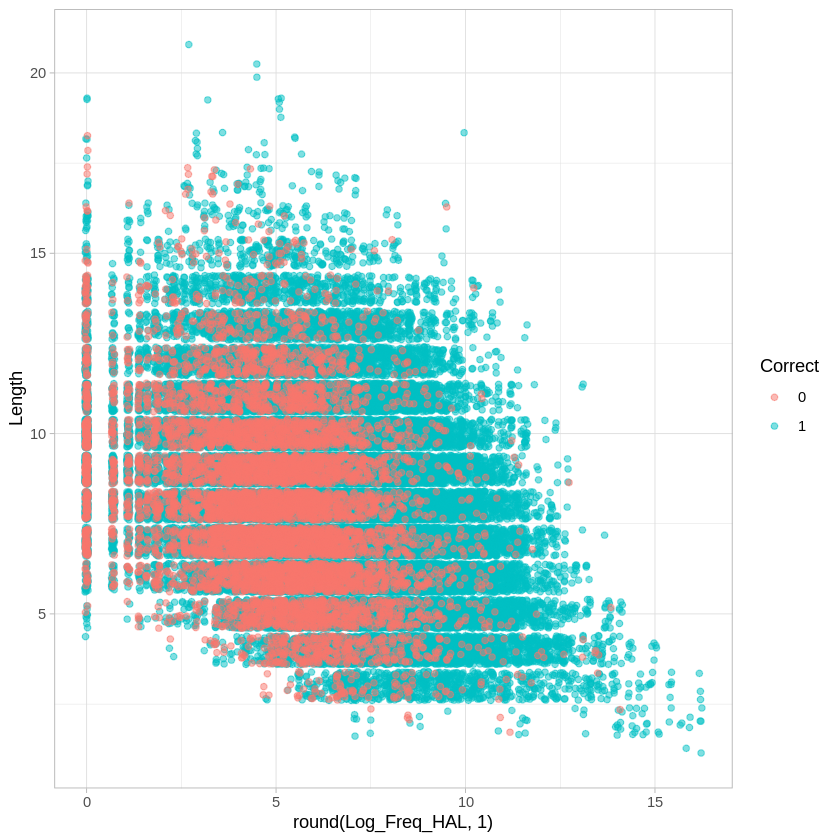

In [3]:
require(tidyverse) # Load the tidyverse package, if you haven't yet
cleaned_dat$Correct <- as.factor(cleaned_dat$Correct) # so that R knows that Correct is categorical, not numeric.

# plot the Correct / Incorrect clusters
ggplot(cleaned_dat,aes(x=round(Log_Freq_HAL,1),y=Length,col=Correct)) +
  geom_point(position="jitter",alpha=0.5) +
  theme_light()


What do you observe about the "Correct" and "Incorrect" clusters?

> The graph shows a spread of correct responses across a range of log frequencies against word lengths. There is a lot of overlap between correct and incorrect responses across the range of log frequencies and word lengths - suggesting that neither variable is a particularly powerful predictor of correct/incorrect responses. The incorrect responses appear to have wider distribution across word lengths compared to correct responses. Additionally, the density of points seems to be greater for correct responses towards the middle of word length while incorrect responses are more spreadout and variable.
>

---
## 3. Logistic Regression: Fitting the model (2 points)

Fit a logistic regression model to the data using `Length`, `Log_Freq_HAL`, and their interaction to predict `Correct`. Use `glm()` to fit the model, and look at its output using `summary()`.

In [4]:
# WRITE YOUR CODE HERE
log_reg_model <- glm(Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, data = cleaned_dat, family = "binomial")
summary(log_reg_model)



Call:
glm(formula = Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, 
    family = "binomial", data = cleaned_dat)

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.939996   0.115623  -8.130 4.30e-16 ***
Length               0.151266   0.012789  11.828  < 2e-16 ***
Log_Freq_HAL         0.394772   0.018762  21.041  < 2e-16 ***
Length:Log_Freq_HAL -0.010558   0.002202  -4.795 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 49809  on 70588  degrees of freedom
Residual deviance: 46563  on 70585  degrees of freedom
AIC: 46571

Number of Fisher Scoring iterations: 5


What can you conclude from this output? (a brief gist is fine)

> 1. intercept is significant but not particularly meaningful in interpretation because it is unlikely for word length and log frequency to be 0.
> 2. significant interaction effect between word length and log frequency -- interaction term is negative and significant, indicating that the effect of word length on probabilty of correct response varies on the value of log frequency and vice versa.
> 3. main effects of word length and log frequency left uninterpreted due to significant interaction effect

---
## 4. Interpreting predictions from the model (3 points)

Finally, look at how well this logistic regression model does at predicting correctness. Use `predict()` and a threshold of 0.5 to generate predicted `Correct` values for each trial, then output a confusion matrix and overall accuracy for these predictions.

*Hint: see the Classifiers tutorial.*

In [7]:
# WRITE YOUR CODE HERE
# Use predict() to generate predicted probabilities
cleaned_dat$predicted_probability <- predict(log_reg_model, type = "response")

# Set threshold to 0.5 to determine predicted Correct values
cleaned_dat$predicted <- ifelse(cleaned_dat$predicted_probability >= 0.5, 1, 0)

# Now let's look at the prediction accuracy
confusion_df = data.frame(cleaned_dat$predicted, cleaned_dat$Correct)
colnames(confusion_df) = c('predicted', 'actual')

table(confusion_df)
print(paste("Accuracy:",mean(confusion_df$predicted == confusion_df$actual)))

         actual
predicted     0     1
        0    13    44
        1  7966 62566

[1] "Accuracy: 0.886526229299183"


Did the model do well at predicting lexical decision correctness? Why or why not?

> The prediction accuracy is high with 88.65% but the confusion matrix shows that the model has a high number of false positives where many incorrect resonses were predicted as being correct. this may suggest a bias towards predicting correct responses.
>

## 5. QDA (3 points)

Load in the `MASS` library and fit a QDA model to the data set. The predictors are still `Length`, `Log_Freq_HAL`, and their interaction, just like the logistic regression model you just ran, and the dependent variable is still `Correct`.

*Hint: see the Classifiers tutorial.*

In [ ]:
# WRITE YOUR CODE HERE
library(MASS)

qda_model <- qda(Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, data = cleaned_dat)
qda_model

Call:
qda(Correct ~ Length + Log_Freq_HAL + Length:Log_Freq_HAL, data = cleaned_dat)

Prior probabilities of groups:
        0         1 
0.1130346 0.8869654 

Group means:
    Length Log_Freq_HAL Length:Log_Freq_HAL
0 8.047124     4.932123            37.95260
1 7.979971     6.444849            49.34219

Now look at how well the predicted `Correct` values compare with actual `Correct` values for the whole data set. Output a confusion matrix and overall prediction accuracy.

In [ ]:
# WRITE YOUR CODE HERE
qda_pred <- predict(qda_model, type = "response")
qda_class <- qda_pred$class
table(qda_class, cleaned_dat$Correct)
print(paste("Accuracy:",mean(qda_class==cleaned_dat$Correct)))

         
qda_class     0     1
        0   455  1647
        1  7524 60963

[1] "Accuracy: 0.870078907478502"


How does QDA prediction performance differ from that of logistic regression?

> logistic regression and QDA seem to perform similarly, but logistic regression performs slightly better by about 1.65%. It seems unclear if this small performance difference is meaningful.
>

**DUE:** 5pm EST, March 11, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*